# Tarea 10 
Usando la EDE-PR, determinar la densidad del líquido y vapor para la composición mostrada en la Figura 15. Asumir los CIB cero. 
<p>La mezcla está en equilibrio a 4000 psia y 60 oF
    <br>
    <br> 
    Por motivos de espacio, las funciones se agregaron a un script de Spyder, y fueron importadas del mismo

In [36]:
from Script10 import *
import pandas as pd
from IPython.display import Image

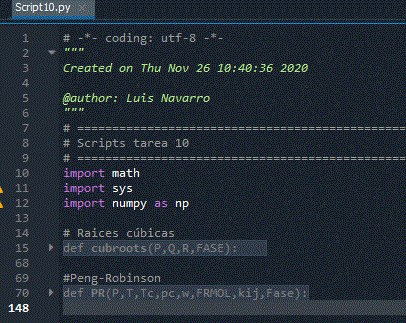

In [39]:
Image(filename = "C:/Users/Luis Navarro/Desktop/ProgrammingStuff/PetroleumData/Ing.Yac.Gas/Script10.gif", width = 350, height = 150)

### Declaracion de propiedades de los componentes

In [2]:
names = ['C1', 'C2','C3','C4','C5','C6', 'C7+']
x= [0.45,0.05,0.05,0.03,0.01,0.01,0.40]
y= [0.86,0.05,0.05,0.02,0.01,0.005,0.005]
M = [16.04, 30.070, 44.096,58.123,72.150,86.177,215]
Tc = [343.33,549.92,666.06,765.62,845.8,923,1160]
pc = [666.4, 706.5,616.0,527.9,488.6,453.0,285]
w = [0.0104,0.0979,0.1522,0.1852,0.2280,0.2500,0.5200]
ncomps = len(w)
kij=[[ 0 for i in range(ncomps) ] for j in range(ncomps)]

In [5]:
print("Sumatoria de Fraccion molares :\n")
print("x_i =",sum(x))
print("y_i =",sum(y))

Sumatoria de Fraccion molares :

x_i = 1.0
y_i = 1.0


### Constantes

In [3]:
R = 10.73146 # Universal gas constant, psia-ft3/R-lbm mol
Tem = 160 + 460 # deg R
Prs = 4000 # psia
ncomps = len(x)

In [7]:
ZL = PR(Prs,Tem,Tc,pc,w,x,kij,"L")

ZV = PR(Prs,Tem,Tc,pc,w,y,kij,"V")   

print("Factores de desviacion :\n")
print('\t\t\t\tZ fase Líquida:', round(ZL,4))
print('\t\t\t\tZ fase Gas    :', round(ZV,4))


Factores de desviacion :

				Z fase Líquida: 1.2651
				Z fase Gas    : 0.8631


### Construccion de DataFrame

In [10]:
names = ['C1', 'C2','C3','C4','C5','C6', 'C7+']
weight = ['16.04','30.07','44.09','58.12','72.15','86.17','215']
weight = pd.to_numeric(weight)
Tabla = {'Names':['C1', 'C2','C3','C4','C5','C6', 'C7+']}
Res = pd.DataFrame(Tabla,columns=['Names'])
Res["xi"]=x
Res["yi"]=y 
Res["Mi"]=weight

In [11]:
Res

,Names,xi,yi,Mi
0,C1,0.45,0.860,16.04
1,C2,0.05,0.050,30.07
2,C3,0.05,0.050,44.09
3,C4,0.03,0.020,58.12
4,C5,0.01,0.010,72.15
5,C6,0.01,0.005,86.17
6,C7+,0.40,0.005,215.00


In [13]:
Res["xiMi"]=Res["xi"]*Res["Mi"]
Res["yiMi"]=Res["yi"]*Res["Mi"]

In [14]:
Res

,Names,xi,yi,Mi,xiMi,yiMi
0,C1,0.45,0.860,16.04,7.2180,13.79440
1,C2,0.05,0.050,30.07,1.5035,1.50350
2,C3,0.05,0.050,44.09,2.2045,2.20450
3,C4,0.03,0.020,58.12,1.7436,1.16240
4,C5,0.01,0.010,72.15,0.7215,0.72150
5,C6,0.01,0.005,86.17,0.8617,0.43085
6,C7+,0.40,0.005,215.00,86.0000,1.07500


In [16]:
xM = sum(Res["xiMi"])
yM = sum(Res["yiMi"])

In [20]:
print("Pesos moleculares de las fases: \n")
print("M_L para la fase liquida = ",xM)
print("M_V para la fase vapor =",yM)

Pesos moleculares de las fases: 

M_L para la fase liquida =  100.25280000000001
M_V para la fase vapor = 20.892149999999997


### Calculo de densidades para las fases
$$ \rho_L = \frac{PM_L}{Z_LRT} $$
<br>
$$ \rho_V = \frac{PM_V}{Z_VRT} $$

In [21]:
rho_L = (Prs*xM)/(ZL*R*Tem)
rho_V = (Prs*yM)/(ZV*R*Tem)

In [26]:
print("Densidades de las fases: \n\t\t\t\tRho_L =",round(rho_L,5),"[lbm/ft^3]\n\t\t\t\tRho_V =",round(rho_V,5),"[lbm/ft^3]")


Densidades de las fases: 
				Rho_L = 47.64254 [lbm/ft^3]
				Rho_V = 14.55251 [lbm/ft^3]


#### DataFrame de resultados

In [34]:
DF = Res[["Names","xi","yi","Mi"]]
DF["Tc"] = Tc ; DF["Pc"] = pc ; DF["wi"] = w
DF["xiMi"] = Res["xiMi"]
DF["yiMi"] = Res["yiMi"]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
DF

,Names,xi,yi,Mi,Tc,Pc,wi,xiMi,yiMi
0,C1,0.45,0.860,16.04,343.33,666.4,0.0104,7.2180,13.79440
1,C2,0.05,0.050,30.07,549.92,706.5,0.0979,1.5035,1.50350
2,C3,0.05,0.050,44.09,666.06,616.0,0.1522,2.2045,2.20450
3,C4,0.03,0.020,58.12,765.62,527.9,0.1852,1.7436,1.16240
4,C5,0.01,0.010,72.15,845.80,488.6,0.2280,0.7215,0.72150
5,C6,0.01,0.005,86.17,923.00,453.0,0.2500,0.8617,0.43085
6,C7+,0.40,0.005,215.00,1160.00,285.0,0.5200,86.0000,1.07500
